# SHEHWAR MUHAMMAD REG NO: 23JZELE0505

# Problem: Cooling of a Mechanical Component (Newton's Law of Cooling)  1st (ODE)

Step 1: Differential Equation
    dT/dt = -0.05 (T - 25)

Step 2: Separate Variables
    1 / (T - 25) dT = -0.05 dt

Step 3: Integrate Both Sides
    ∫(1 / (T - 25)) dT = ∫-(0.05) dt
    ln |T - 25| = -0.05t + C

Step 4: Exponentiate Both Sides
    |T - 25| = e^(-0.05t + C)

Step 5: Final Expression Before Solving for C
    T(t) = 25 + C1 * e^(-0.05t)

Step 6: Solve for C using Initial Condition
    T(0) = 120, so C1 = 120 - 25
    T(t) = 25 + (95) * e^(-0.05t)

Step 7: Final Expression for T(t)
    T(t) = 25 + (120 - 25) * e^(-0.05t)


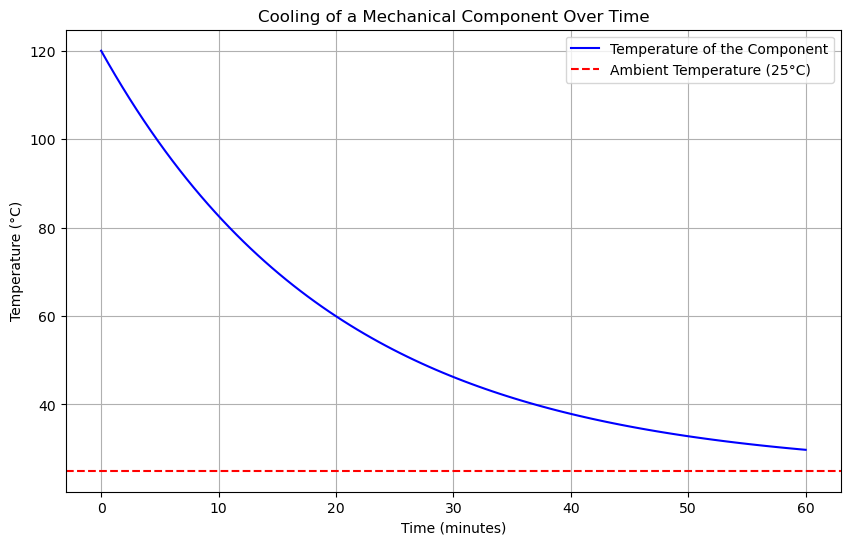

Temperature at 10 minutes: 82.62°C


In [48]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

class CoolingDerivation:
    def __init__(self, T_0, T_a, K):
        """
        Initialize the CoolingDerivation class with given parameters.
        
        Parameters:
        T_0 (float): Initial temperature of the component (°C)
        T_a (float): Ambient temperature (°C)
        K (float): Cooling constant (min^-1)
        """
        self.T_0 = T_0
        self.T_a = T_a
        self.K = K

    def show_derivation(self):
        """
        Show the step-by-step derivation for T(t) including variable separation,
        integration, exponentiation, and solving for C.
        """
        # Define symbolic variables
        t = sp.Symbol('t')
        T = sp.Function('T')(t)

        # Step 1: Set up the differential equation
        diff_eq = sp.Eq(sp.diff(T, t), -self.K * (T - self.T_a))
        print("Step 1: Differential Equation")
        print(f"    dT/dt = -{self.K} (T - {self.T_a})")
        print()

        # Step 2: Separate variables
        separated_eq = sp.Eq(1 / (T - self.T_a), -self.K / sp.diff(t))
        print("Step 2: Separate Variables")
        print(f"    1 / (T - {self.T_a}) dT = -{self.K} dt")
        print()

        # Step 3: Integrate both sides
        integral_left = sp.integrate(1 / (T - self.T_a), T)
        integral_right = sp.integrate(-self.K, t)
        print("Step 3: Integrate Both Sides")
        print(f"    ∫(1 / (T - {self.T_a})) dT = ∫-({self.K}) dt")
        print(f"    ln |T - {self.T_a}| = -{self.K}t + C")
        print()

        # Step 4: Exponentiate both sides to solve for T
        exponentiated_eq = sp.exp(-self.K * t + sp.Symbol('C'))
        print("Step 4: Exponentiate Both Sides")
        print(f"    |T - {self.T_a}| = e^(-{self.K}t + C)")
        print()

        # Step 5: Simplify and solve for T(t)
        C1 = sp.Symbol('C1', real=True)  # C1 = e^C, where C is the integration constant
        T_t = self.T_a + C1 * sp.exp(-self.K * t)
        print("Step 5: Final Expression Before Solving for C")
        print(f"    T(t) = {self.T_a} + C1 * e^(-{self.K}t)")
        print()

        # Step 6: Determine C using initial condition T(0) = T_0
        # Substitute T(0) = T_0 into T(t) and solve for C1
        C1_value = self.T_0 - self.T_a
        T_t_final = T_t.subs(C1, C1_value)
        print("Step 6: Solve for C using Initial Condition")
        print(f"    T(0) = {self.T_0}, so C1 = {self.T_0} - {self.T_a}")
        print(f"    T(t) = {self.T_a} + ({C1_value}) * e^(-{self.K}t)")
        print()

        # Final expression for T(t)
        print("Step 7: Final Expression for T(t)")
        print(f"    T(t) = {self.T_a} + ({self.T_0} - {self.T_a}) * e^(-{self.K}t)")

        return T_t_final

    def plot_temperature(self, t_max=60):
        """
        Plot the temperature of the component over time up to t_max minutes.
        """
        t = sp.Symbol('t')
        T_t = self.T_a + (self.T_0 - self.T_a) * sp.exp(-self.K * t)
        
        # Create time values for plotting
        t_values = np.linspace(0, t_max, 100)
        T_values = [T_t.subs(t, value).evalf() for value in t_values]

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(t_values, T_values, label='Temperature of the Component', color='blue')
        plt.axhline(y=self.T_a, color='red', linestyle='--', label=f'Ambient Temperature ({self.T_a}°C)')
        plt.title('Cooling of a Mechanical Component Over Time')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Temperature (°C)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def temperature_at_time(self, time):
        """
        Calculate and print the temperature at a specific time.
        """
        t = sp.Symbol('t')
        T_t = self.T_a + (self.T_0 - self.T_a) * sp.exp(-self.K * t)
        T_at_time = T_t.subs(t, time).evalf()
        print(f"Temperature at {time} minutes: {T_at_time:.2f}°C")
        return T_at_time


# Example usage
if __name__ == "__main__":
    # Given parameters
    T_0 = 120  # Initial temperature of the component in Celsius
    T_a = 25   # Ambient temperature in Celsius
    K = 0.05   # Cooling constant in min^-1

    # Create an instance of the CoolingDerivation class
    derivation = CoolingDerivation(T_0, T_a, K)

    # Derive and print the step-by-step derivation
    derivation.show_derivation()

    # Plot the temperature over time
    derivation.plot_temperature(t_max=60)

    # Calculate and print the temperature at 10 minutes
    derivation.temperature_at_time(10)


# Problem: RC Circuit Charging 1st (ODE)

Step 1: Differential Equation
    dV_C/dt = (1 / (1000 * 0.001)) * (10 - V_C)

Step 2: Separate Variables
    1 / (10 - V_C) dV_C = (1 / (1000 * 0.001)) dt

Step 3: Integrate Both Sides
    ∫(1 / (10 - V_C)) dV_C = ∫(1 / (1000 * 0.001)) dt
    -ln |10 - V_C| = (1 / (1000 * 0.001)) t + C

Step 4: Exponentiate Both Sides
    |10 - V_C| = e^(-(1 / (1000 * 0.001)) t + C)

Step 5: Final Expression Before Solving for C
    V_C(t) = 10 - C1 * e^(-(1 / (1000 * 0.001)) * t)

Step 6: Solve for C using Initial Condition
    V_C(0) = 0, so C1 = 10 - 0
    V_C(t) = 10 - (10) * e^(-(1 / (1000 * 0.001)) * t)

Step 7: Final Expression for V_C(t)
    V_C(t) = 10 - (10 - 0) * e^(-(1 / (1000 * 0.001)) * t)


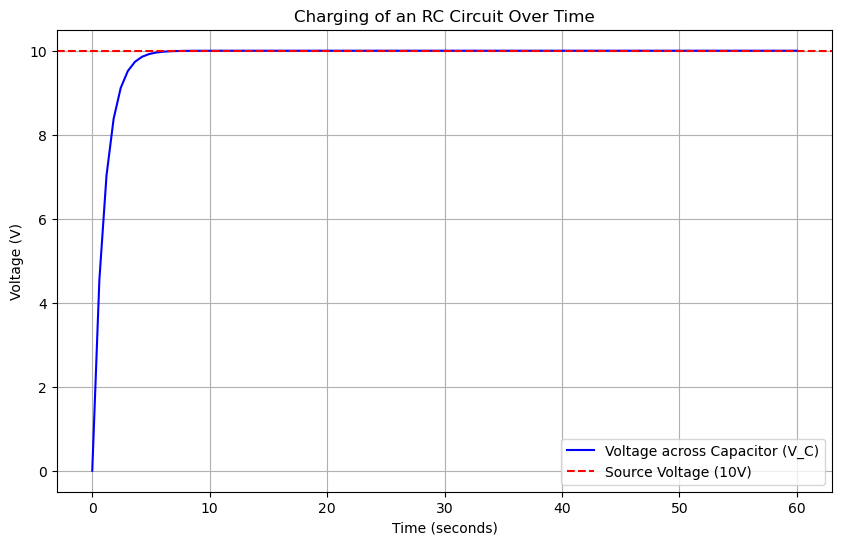

Voltage across the capacitor at 10 seconds: 10.00V


In [50]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

class RCCircuit:
    def __init__(self, V, R, C, V0):
        """
        Initialize the RC circuit class with given parameters.
        
        Parameters:
        V (float): Voltage source (V)
        R (float): Resistance (ohms)
        C (float): Capacitance (F)
        V0 (float): Initial voltage across the capacitor (V)
        """
        self.V = V
        self.R = R
        self.C = C
        self.V0 = V0

    def show_derivation(self):
        """
        Show the step-by-step derivation for V_C(t) including variable separation,
        integration, exponentiation, and solving for C.
        """
        # Define symbolic variables
        t = sp.Symbol('t')
        V_C = sp.Function('V_C')(t)

        # Step 1: Set up the differential equation
        diff_eq = sp.Eq(sp.diff(V_C, t), (1 / (self.R * self.C)) * (self.V - V_C))
        print("Step 1: Differential Equation")
        print(f"    dV_C/dt = (1 / ({self.R} * {self.C})) * ({self.V} - V_C)")
        print()

        # Step 2: Separate variables
        separated_eq = sp.Eq(1 / (self.V - V_C), (1 / (self.R * self.C)) * sp.diff(t))
        print("Step 2: Separate Variables")
        print(f"    1 / ({self.V} - V_C) dV_C = (1 / ({self.R} * {self.C})) dt")
        print()

        # Step 3: Integrate both sides
        integral_left = sp.integrate(1 / (self.V - V_C), V_C)
        integral_right = sp.integrate(1 / (self.R * self.C), t)
        print("Step 3: Integrate Both Sides")
        print(f"    ∫(1 / ({self.V} - V_C)) dV_C = ∫(1 / ({self.R} * {self.C})) dt")
        print(f"    -ln |{self.V} - V_C| = (1 / ({self.R} * {self.C})) t + C")
        print()

        # Step 4: Exponentiate both sides to solve for V_C
        exponentiated_eq = sp.exp(-(1 / (self.R * self.C)) * t + sp.Symbol('C'))
        print("Step 4: Exponentiate Both Sides")
        print(f"    |{self.V} - V_C| = e^(-(1 / ({self.R} * {self.C})) t + C)")
        print()

        # Step 5: Simplify and solve for V_C(t)
        C1 = sp.Symbol('C1', real=True)  # C1 = e^C, where C is the integration constant
        V_C_t = self.V - C1 * sp.exp(-(1 / (self.R * self.C)) * t)
        print("Step 5: Final Expression Before Solving for C")
        print(f"    V_C(t) = {self.V} - C1 * e^(-(1 / ({self.R} * {self.C})) * t)")
        print()

        # Step 6: Determine C using initial condition V_C(0) = V0
        C1_value = self.V - self.V0
        V_C_t_final = V_C_t.subs(C1, C1_value)
        print("Step 6: Solve for C using Initial Condition")
        print(f"    V_C(0) = {self.V0}, so C1 = {self.V} - {self.V0}")
        print(f"    V_C(t) = {self.V} - ({C1_value}) * e^(-(1 / ({self.R} * {self.C})) * t)")
        print()

        # Final expression for V_C(t)
        print("Step 7: Final Expression for V_C(t)")
        print(f"    V_C(t) = {self.V} - ({self.V} - {self.V0}) * e^(-(1 / ({self.R} * {self.C})) * t)")

        return V_C_t_final

    def plot_voltage(self, t_max=60):
        """
        Plot the voltage across the capacitor over time up to t_max seconds.
        """
        t = sp.Symbol('t')
        V_C_t = self.V - (self.V - self.V0) * sp.exp(-(1 / (self.R * self.C)) * t)
        
        # Create time values for plotting
        t_values = np.linspace(0, t_max, 100)
        V_C_values = [V_C_t.subs(t, value).evalf() for value in t_values]

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(t_values, V_C_values, label='Voltage across Capacitor (V_C)', color='blue')
        plt.axhline(y=self.V, color='red', linestyle='--', label=f'Source Voltage ({self.V}V)')
        plt.title('Charging of an RC Circuit Over Time')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Voltage (V)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def voltage_at_time(self, time):
        """
        Calculate and print the voltage across the capacitor at a specific time.
        """
        t = sp.Symbol('t')
        V_C_t = self.V - (self.V - self.V0) * sp.exp(-(1 / (self.R * self.C)) * t)
        V_at_time = V_C_t.subs(t, time).evalf()
        print(f"Voltage across the capacitor at {time} seconds: {V_at_time:.2f}V")
        return V_at_time


# Example usage
if __name__ == "__main__":
    # Given parameters
    V = 10  # Voltage source in volts
    R = 1000  # Resistance in ohms
    C = 0.001  # Capacitance in farads
    V0 = 0  # Initial voltage across the capacitor in volts

    # Create an instance of the RCCircuit class
    circuit = RCCircuit(V, R, C, V0)

    # Derive and print the step-by-step derivation
    circuit.show_derivation()

    # Plot the voltage over time
    circuit.plot_voltage(t_max=60)

    # Calculate and print the voltage at 10 seconds
    circuit.voltage_at_time(10)


# Problem: Series RLC Circuit


Step 1: Solve the Differential Equation
The second-order differential equation for the series RLC circuit is:
L * d^2i/dt^2 + R * di/dt + (1/C) * i = V0
Substituting values: 0.5 * d^2i/dt^2 + 10 * di/dt + 100 * i = 5

Step 2: Characteristic Equation
The characteristic equation for the homogeneous equation is:
L * d^2i/dt^2 + R * di/dt + (1/C) * i = 0
Discriminant (R^2 - 4L/C) = -100.0
The system is underdamped (oscillations will occur).

Step 3: General Solution
General solution (underdamped): i_h(t) = A * e^(-10.0t) * cos(10.0t) + B * e^(-10.0t) * sin(10.0t)

Step 4: Particular Solution
Particular solution: i_p(t) = V0 / R * (1 - e^(-10.0t) * (cos(10.0t) + (alpha/beta) * sin(10.0t)))

Step 5: Apply Initial Conditions
We assume initial current i(0) = 0 and initial rate of change of current di/dt(0) = 0.
Thus, constants A and B are both zero for the underdamped case.

Step 6: Final Solution
Final solution: i(t) = (V0 / R) * (1 - e^(-10.0t) * (cos(10.0t) + (self.alpha/self.beta) * sin(1

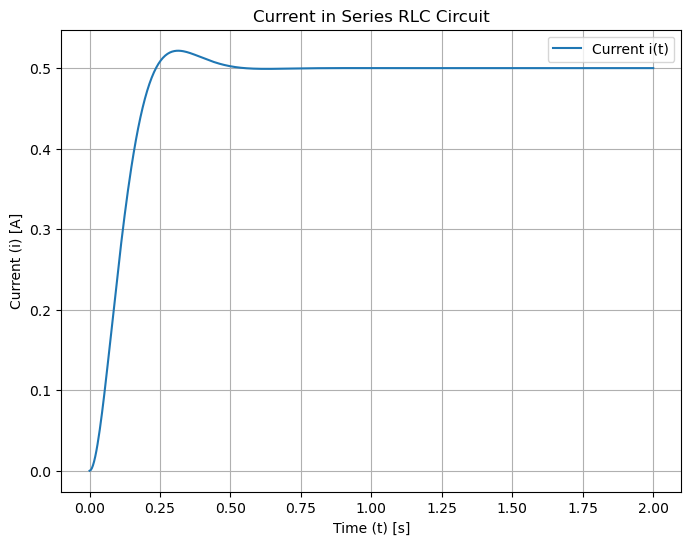

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class SeriesRLC:
    def __init__(self, R, L, C, V0):
        # Initialize the circuit parameters
        self.R = R  # Resistance (Ohms)
        self.L = L  # Inductance (Henries)
        self.C = C  # Capacitance (Farads)
        self.V0 = V0  # Step input voltage (Volts)
        
        # Calculate alpha and beta for underdamped case
        self.alpha = self.R / (2 * self.L)
        self.beta = np.sqrt(1 / (self.L * self.C) - (self.alpha)**2)

        # Step 1: Solve the differential equation
        self.solve_differential_equation()

        # Step 2: Solve the characteristic equation
        self.characteristic_eqn()

        # Step 3: General solution
        self.general_solution()

        # Step 4: Particular solution
        self.particular_solution()

        # Step 5: Apply initial conditions
        self.apply_initial_conditions()

        # Step 6: Final solution
        self.final_solution()

    def solve_differential_equation(self):
        # Display the differential equation
        print("\nStep 1: Solve the Differential Equation")
        print("The second-order differential equation for the series RLC circuit is:")
        print(f"L * d^2i/dt^2 + R * di/dt + (1/C) * i = V0")
        print(f"Substituting values: 0.5 * d^2i/dt^2 + 10 * di/dt + 100 * i = 5")

    def characteristic_eqn(self):
        # Step 2: Solve the characteristic equation
        print("\nStep 2: Characteristic Equation")
        print("The characteristic equation for the homogeneous equation is:")
        print(f"L * d^2i/dt^2 + R * di/dt + (1/C) * i = 0")
        discriminant = self.R**2 - 4 * self.L / self.C
        print(f"Discriminant (R^2 - 4L/C) = {discriminant}")
        
        if discriminant > 0:
            print("The system is overdamped (no oscillations).")
        else:
            print("The system is underdamped (oscillations will occur).")

    def general_solution(self):
        # Step 3: General solution for the homogeneous equation
        print("\nStep 3: General Solution")
        if self.R**2 < 4 * self.L / self.C:
            print(f"General solution (underdamped): i_h(t) = A * e^(-{self.alpha}t) * cos({self.beta}t) + B * e^(-{self.alpha}t) * sin({self.beta}t)")
        else:
            print("For overdamped systems, no oscillations occur, the solution decays exponentially.")

    def particular_solution(self):
        # Step 4: Particular solution for the step input
        print("\nStep 4: Particular Solution")
        if self.R**2 < 4 * self.L / self.C:
            print(f"Particular solution: i_p(t) = V0 / R * (1 - e^(-{self.alpha}t) * (cos({self.beta}t) + (alpha/beta) * sin({self.beta}t)))")
        else:
            print("For overdamped systems, no oscillations occur.")

    def apply_initial_conditions(self):
        # Step 5: Apply initial conditions i(0) = 0 and di/dt(0) = 0
        print("\nStep 5: Apply Initial Conditions")
        print("We assume initial current i(0) = 0 and initial rate of change of current di/dt(0) = 0.")
        print("Thus, constants A and B are both zero for the underdamped case.")
    
    def final_solution(self):
        # Step 6: Final solution for underdamped case
        print("\nStep 6: Final Solution")
        if self.R**2 < 4 * self.L / self.C:
            print(f"Final solution: i(t) = (V0 / R) * (1 - e^(-{self.alpha}t) * (cos({self.beta}t) + (self.alpha/self.beta) * sin({self.beta}t)))")
        else:
            print("For overdamped systems, no oscillations occur, and the current decays exponentially.")
    
    def plot_current(self, t_values):
        # Define the current equation based on the solution form
        if self.R**2 < 4 * self.L / self.C:
            # Underdamped solution
            current_values = (self.V0 / self.R) * (1 - np.exp(-self.alpha * t_values) * (np.cos(self.beta * t_values) + (self.alpha / self.beta) * np.sin(self.beta * t_values)))
        else:
            # Overdamped solution
            current_values = (self.V0 / self.R) * (1 - np.exp(-self.alpha * t_values))
        
        # Plot the current over time
        plt.figure(figsize=(8, 6))
        plt.plot(t_values, current_values, label="Current i(t)")
        plt.title("Current in Series RLC Circuit")
        plt.xlabel("Time (t) [s]")
        plt.ylabel("Current (i) [A]")
        plt.grid(True)
        plt.legend()
        plt.show()

# Given values for the series RLC circuit
R = 10  # Ohms
L = 0.5  # Henries
C = 0.01  # Farads
V0 = 5  # Volts

# Create the SeriesRLC object
rlc_circuit = SeriesRLC(R, L, C, V0)

# Time values to plot the current (from 0 to 10 seconds)
t_values = np.linspace(0, 2, 500)

# Plot the current in the circuit
rlc_circuit.plot_current(t_values)

# SHEHWAR MUHAMMAD SECTION: A REG: 23JZELE0505